In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
data = pd.read_csv("./data/features2_all.csv")
X = data[data.columns[:-1]]
y = data['y']

In [4]:
from Python.sklearn.data_split import *

X_bal, y_bal = balance_up_sample(X, y)
X_bal

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 8.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.0000e+00, 4.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [4.0392e+04, 2.0000e+00, 0.0000e+00, ..., 3.0000e+00, 0.0000e+00,
        1.0000e+00],
       [3.7942e+04, 7.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.7824e+04, 9.9000e+01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_bal, y_bal, test_size=0.20)


In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

In [7]:
from sklearn.metrics import f1_score
print(f1_score(y_train, y_train_pred))
print(f1_score(y_valid, y_valid_pred))

1.0
0.9692810021989737


In [8]:
from sklearn.metrics import confusion_matrix

confmt = confusion_matrix(y_true=y_valid, y_pred=y_valid_pred)
print(confmt)

[[6886  455]
 [   6 7273]]


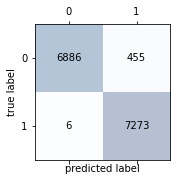

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmt.shape[0]):
    for j in range(confmt.shape[1]):
        ax.text(x=j, y=i, s=confmt[i, j], va='center', ha='center')
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 6, 7, 8, 9, 10],
    'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
    'min_samples_leaf': [1, 3, 5],
    "max_features": [1, 3, 4, 5, 6, 7, 9, 10]
}]

gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted')

gs.fit(X_train, y_train)
print(gs.best_score_)
